In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv('usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273544,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


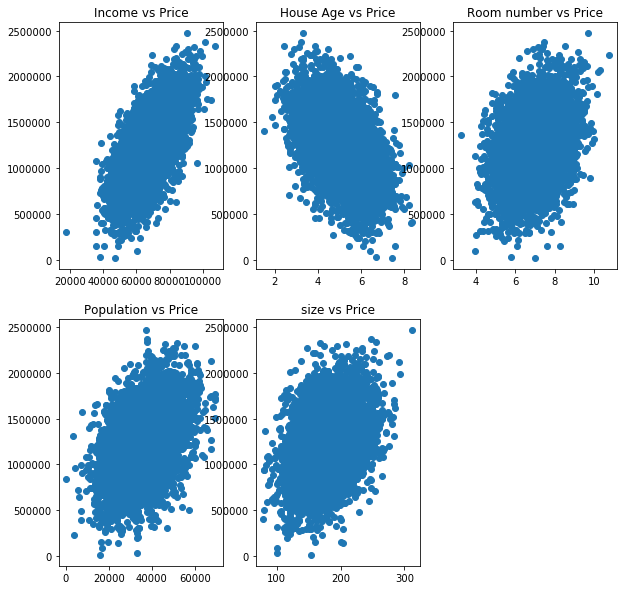

In [15]:
%matplotlib inline  #can be deleted in this example
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 10))
fig1 = plt.subplot(231)
plt.scatter(data.loc[:, 'Avg. Area Income'], data.loc[:, 'Price'])
plt.title('Income vs Price')
fig2 = plt.subplot(232)
plt.scatter(data.loc[:, 'Avg. Area House Age'], data.loc[:, 'Price'])
plt.title('House Age vs Price')
fig3 = plt.subplot(233)
plt.scatter(data.loc[:, 'Avg. Area Number of Rooms'], data.loc[:, 'Price'])
plt.title('Room number vs Price')
fig4 = plt.subplot(234)
plt.scatter(data.loc[:, 'Area Population'], data.loc[:, 'Price'])
plt.title('Population vs Price')
fig5 = plt.subplot(235)
plt.scatter(data.loc[:, 'size'], data.loc[:, 'Price'])
plt.title('size vs Price')

plt.show()

In [10]:
x = data.loc[:, 'size']
y = data.loc[:, 'Price']
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [11]:
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
print(x.shape)

(5000, 1)


In [12]:
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
#train the model
LR1.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#calculate price vs size
y_predict_1 = LR1.predict(x)
print(y_predict_1)

[[1276881.85636623]
 [1173363.58767144]
 [1420407.32457443]
 ...
 [1097848.86467426]
 [1264502.88144558]
 [1131278.58816273]]


In [16]:
#evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error_1 = mean_squared_error(y, y_predict_1)
r2_score_1 = r2_score(y, y_predict_1)
print(mean_squared_error_1, r2_score_1)

108771672553.6264 0.1275031240418234


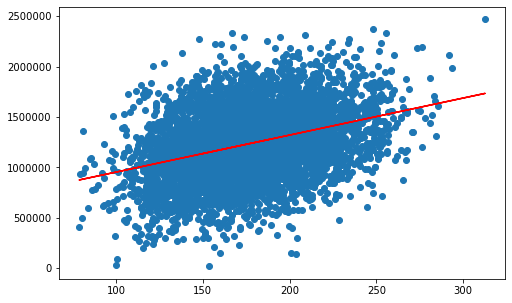

In [18]:
fig6 = plt.figure(figsize = (8, 5))
plt.scatter(x, y)
plt.plot(x, y_predict_1, 'r')  #'r' means red
plt.show()

In [19]:
#define x_multi
x_multi = data.drop(['Price'], axis = 1)
x_multi

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273544
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659
...,...,...,...,...,...
4995,60567.94414,3.169638,6.137356,22837.36103,161.641403
4996,78491.27543,4.000865,6.576763,25616.11549,159.164596
4997,63390.68689,3.749409,4.805081,33266.14549,139.491785
4998,68001.33124,5.465612,7.130144,42625.62016,184.845371


In [21]:
#set up 2nd linear model
LR_multi = LinearRegression()
#train the model
LR_multi.fit(x_multi, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_predict_multi = LR_multi.predict(x_multi)
print(y_predict_multi)

[[1223968.89166086]
 [1497306.3318863 ]
 [1250884.31019437]
 ...
 [1020693.92390376]
 [1260503.36914585]
 [1302737.7915763 ]]


In [24]:
mean_squared_error_multi = mean_squared_error(y, y_predict_multi)
r2_score_multi = r2_score(y, y_predict_multi)
print(mean_squared_error_multi, r2_score_multi)

10219846512.177862 0.9180229195220739


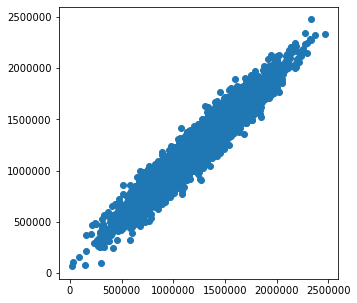

In [27]:
fig7 = plt.figure(figsize = (5, 5))
plt.scatter(y, y_predict_multi)
plt.show()

In [28]:
x_test = [65000, 5, 5, 30000, 200]
x_test = np.array(x_test).reshape(1, -1)  #one line and unknown column
print(x_test, x_test.shape)

[[65000     5     5 30000   200]] (1, 5)


In [29]:
y_test_predict = LR_multi.predict(x_test)
print(y_test_predict)

[[817052.19516298]]
